# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sklearn 

## Giới thiệu
## Ý tưởng
## Giải nhanh bằng tay

In [2]:
data = np.genfromtxt('data.txt')

In [3]:
data

array([[ 6.  ,  3.  ],
       [ 0.98,  0.63],
       [ 1.84,  0.67],
       [ 2.13,  1.27],
       [ 2.6 ,  1.52],
       [ 3.5 ,  1.54],
       [ 3.76,  2.04],
       [ 4.14,  2.27],
       [ 4.61,  2.14],
       [ 1.51,  0.9 ],
       [ 1.3 ,  0.54],
       [ 4.91,  2.59],
       [ 5.21,  3.  ],
       [ 5.69,  3.15],
       [ 6.48,  2.84],
       [ 0.79,  0.22],
       [ 0.51,  0.42]])

(0, 3.3036543180583622)

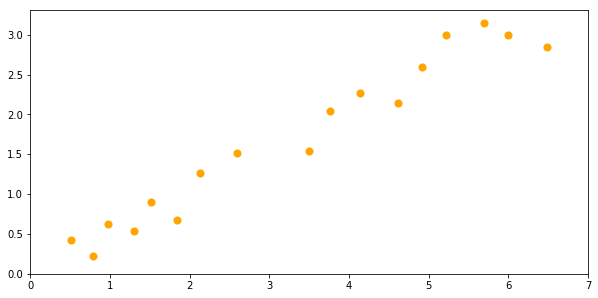

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal', adjustable='box')
ax.scatter(data[:, 0], data[:, 1], c='orange', s=50, label='Dữ liệu thu được')
ax.set_xlim(0,7)
ax.set_ylim([0, None])

(3.2917647058823531, 1.6905882352941177)
(4.4119942816297346, 2.2507773409578271)
0.500066341571
0.0444875015107


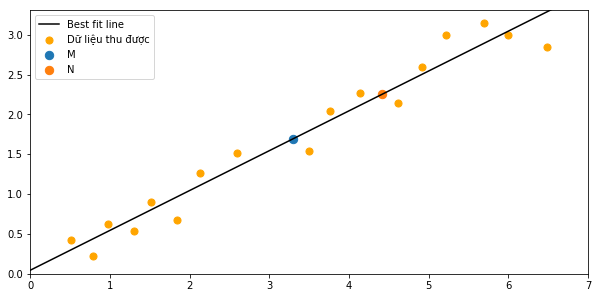

In [5]:
M = (np.mean(data[:, 0]), np.mean(data[:, 1]))
N = (np.mean(data[:, 0]**2)/np.mean(data[:, 0]), np.mean(data[:, 0]*data[:, 1])/np.mean(data[:, 0]))
print(M)
print(N)
a = (N[1] - M[1])/(N[0] - M[0])
b = M[1] - a*M[0]
print(a)
print(b)
ax.plot([0, 7], [b, a*7+b], c='black', label='Best fit line')
ax.scatter(M[0], M[1], s=70, label='M')
ax.scatter(N[0], N[1], s=70, label='N')
ax.set_aspect('equal', adjustable='box')
ax.legend()
fig

## Giải bằng nghiệm của phân tích toán học

In [6]:
y = np.matrix(data[:, 1]).T
x = np.matrix(data[:, 0]).T
x1 = np.ones((len(data), 1))
X = np.concatenate((x1, x), axis=1)
X

matrix([[ 1.  ,  6.  ],
        [ 1.  ,  0.98],
        [ 1.  ,  1.84],
        [ 1.  ,  2.13],
        [ 1.  ,  2.6 ],
        [ 1.  ,  3.5 ],
        [ 1.  ,  3.76],
        [ 1.  ,  4.14],
        [ 1.  ,  4.61],
        [ 1.  ,  1.51],
        [ 1.  ,  1.3 ],
        [ 1.  ,  4.91],
        [ 1.  ,  5.21],
        [ 1.  ,  5.69],
        [ 1.  ,  6.48],
        [ 1.  ,  0.79],
        [ 1.  ,  0.51]])

In [7]:
print(np.linalg.pinv(X.T * X)*X.T*y)

[[ 0.0444875 ]
 [ 0.50006634]]


## Giải bằng thư viện `scikit-learn`

In [8]:
from sklearn import datasets, linear_model

lr = linear_model.LinearRegression(fit_intercept=False)
lr.fit(X, y)
print(lr.coef_)

[[ 0.0444875   0.50006634]]


/Users/thienhoang/.pyenv/versions/3.6.0/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## Mô phỏng biến động hàm $g(a,b)$

In [9]:
def g(a,b):
    sum = 0
    for p in data:
        sum += (p[1]-a*p[0]-b)**2
    return sum

In [10]:
X = np.arange(-1, 1, 0.04)
Y = np.arange(-1, 1, 0.04)
X, Y = np.meshgrid(X, Y)
Z = np.zeros(X.shape)

In [11]:
for p in data:
    Z += (p[1]-X*p[0]-Y)**2

In [12]:
Z

array([[ 750.2596    ,  716.34993632,  683.23033728, ...,   10.56528288,
          13.78865728,   17.80209632],
       [ 742.1508    ,  708.42020832,  675.47968128, ...,   10.87286688,
          14.27531328,   18.46782432],
       [ 734.0964    ,  700.54488032,  667.78342528, ...,   11.23485088,
          14.81636928,   19.18795232],
       ..., 
       [ 427.9524    ,  402.45912032,  377.75590528, ...,   83.82813088,
          95.46788928,  107.89771232],
       [ 422.4004    ,  397.08619232,  372.56204928, ...,   86.69251488,
          98.51134528,  111.12024032],
       [ 416.9028    ,  391.76766432,  367.42259328, ...,   89.61129888,
         101.60920128,  114.39716832]])

In [13]:
g(0.5, 0.04)

0.79410000000000025

In [14]:
plt.rcParams.update({'font.size': 13, 'font.family': 'sans', 'text.usetex': False})

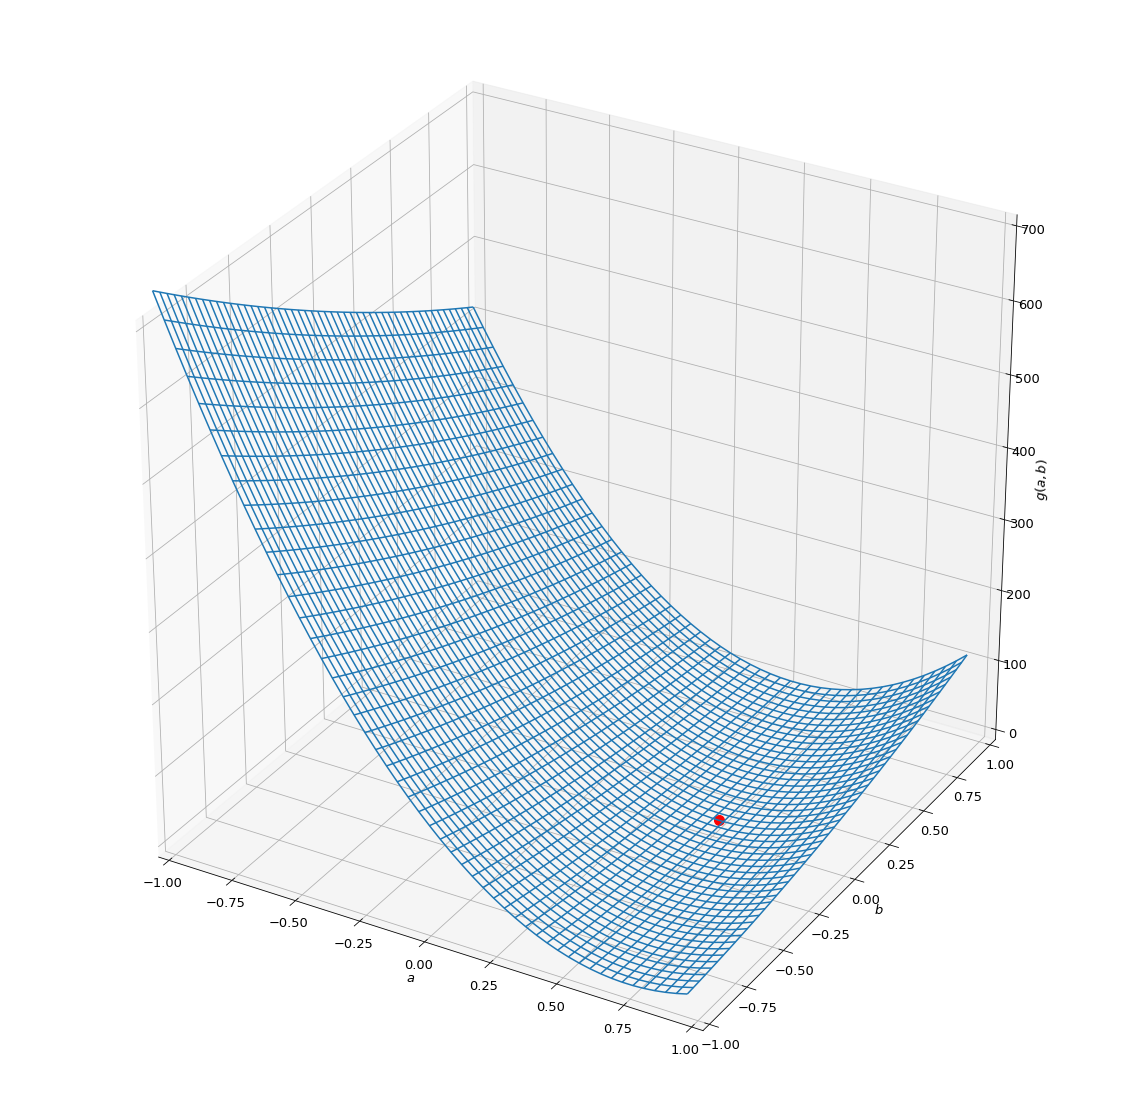

In [15]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(X, Y, Z)
ax.scatter(a, b, g(a, b), s=100, marker='o', c='r')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 700)
ax.set_xlabel("$a$")
ax.set_ylabel("$b$")
ax.set_zlabel("$g(a, b)$")
plt.show(fig)